In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from casadi import *
import scipy.interpolate
import math

In [2]:
#state initilisation
init_state= [0,0,0]
goal_pose = [3,2,0]

#robot paramertes


In [3]:
#supplemntary model, but not used for the optimization problem...
length= 1.2
ds=0.1
v= 2.77
class model:
    def __init__(self,x=0.0,y=0.0,theta=0.0,v=0):
        self.x=x
        self.y=y
        self.theta=theta
        self.v= v
    
    def pi_2_pi(angle):
        return (angle + math.pi) % (2 * math.pi) - math.pi

    def robot_model(state,v,delta,dt,L):
        state.v=v
        state.x = state.x + state.v * math.cos(state.theta) * dt
        state.y = state.y + state.v * math.sin(state.theta) * dt
        state.theta = state.theta + state.v / L * math.tan(delta) * dt
        state.theta = model.pi_2_pi(state.theta)
        
        return state

    def generate_trajectory(dis,km,kf):
        print(dis)
        sample= dis/ds
        print(sample)
        time= dis/v
        dt=float(time/sample) 
        tk= np.array([0.0,time/2.0,time])
        kk= np.array([0.0,km,kf])
        t=np.arange(0.0,time,time/sample)
        fkp= scipy.interpolate.interp1d(tk,kk,kind="quadratic")
        spline=[fkp(ti) for ti in t]
        state=model()
        x,y,theta= [state.x],[state.y],[state.theta]
        
        for i in spline:
            model.robot_model(state,v,i,dt,length)
            x.append(state.x)
            y.append(state.y)
            theta.append(state.theta)
            
        return x,y,theta 
            

In [4]:
kh=0.2
kv=0.4


In [5]:
for i in range(2,10):
    xc,yc,yawc=model.generate_trajectory(i,i/10,i/20)
    #plt.plot(xc,yc)
    #plt.show()
    

2
20.0
3
30.0
4
40.0
5
50.0
6
60.0
7
70.0
8
80.0
9
90.0


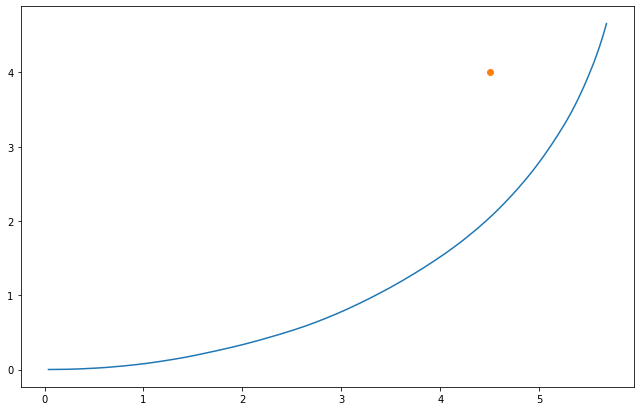

xc [0.04000000000000001, 0.0799987186813238, 0.11999556687716395, 0.15999142709325084, 0.19998572516597693, 0.2399731490605602, 0.27994808277786914, 0.3199116007929305, 0.35985422441447895, 0.39978785321925797, 0.4397101695561267, 0.4796242095551896, 0.5195191960345563, 0.5593774698320992, 0.5992352652321522, 0.6390495723417762, 0.6788107180634096, 0.7185637367448715, 0.7582629852680278, 0.797959745894637, 0.8376523706315444, 0.8772758279700329, 0.9168417957038688, 0.9564019414543349, 0.995900276956447, 1.0353274095604492, 1.0747237092813908, 1.1140290402474742, 1.153271130212398, 1.192462303269668, 1.2316195755532011, 1.2707127022489675, 1.30979052644378, 1.3488183470654433, 1.387776755785719, 1.42666006025663, 1.465425196808237, 1.5040991649430544, 1.542671782231904, 1.5812064643299715, 1.619714935546664, 1.6582030585143388, 1.6966099531309808, 1.7349627983897633, 1.773293569152123, 1.8116091624129138, 1.8498240826466095, 1.8880318830472762, 1.9261841081769484, 1.964242053071733, 2.0

In [170]:
#This is the final model
#Robot model working mechanism by changing the control inputs U (linear and angular velocity(v,ang))
x_init=[0,0]
x_dest=[20,4]
dt=200
v=0.2
ang=[]
#ang=0.023
#ang= [0, 0.5, -0.5, 0.5, 0, 0,0, -1, 0.02 ,0]
for i in range(0,dt):
    o=np.random.uniform(0.0,0.4)
    ang.append(o)

L=1.2
xc,yc,zc=[],[],[]
x,y,theta=0,0,0
fuel=[]
temp=0
val,val1=0,0
#th=(v / L) * math.tan(ang)*20
#x1=v*math.cos((v / L) * math.tan(ang)*20)*20
#y1=v*math.sin((v / L) * math.tan(ang)*20)*20
#print("x",x1)
#print("y",y1)
#print("th",th)
for i in range(0,dt):
    x = x + v*math.cos(theta)*0.2
    y = y + v*math.sin(theta)*0.2 
    theta = theta + (v / L) * math.tan(ang[i])*0.2
    xc.append(x)
    yc.append(y)
    zc.append(theta)
    val1+=x
    #val=sqrt((v**2*(xc[i]**2)+ang**2*(yc[i]**2)))
    #val=(-0.0177*v**2+1.48*v+3.39)+(1.48*ang**2)
    fuel.append(val)
    temp+=val
plt.show()
plt.figure(figsize=(11, 7))
plt.plot(xc,yc,4.5,4,"o")
plt.show()
print("xc",xc)
print("yc",y)
print("zc",zc[-1])
print(ang)
print("val1",val1)
#print("xc",xc)
#print("yc",yc)
#print("zc",zc)

In [637]:
#creating the solver
from casadi import *

v = MX.sym('v')
ang = MX.sym('ang')
x=MX.sym('x')
y=MX.sym('y')
func=0
g=0
#optimization function
for i in range(0,dt):    
    #func=func+sqrt((v**2*(xc[i]**2)+ang**2*(yc[i]**2)))
    #func=func+((-0.0177*v**2+1.48*v+3.39)+(1.48*ang**2))
    func=func+((-0.0177*v**2+1.48*v+3.39)+(1.48*ang**2))*((sqrt(x_dest[1]-x)**2+sqrt(x_dest[0]-y)**2))
                                                           
#g=((x_dest[0]-xc[-1])-(x_dest[1]-yc[-1]))
nlp= {}
nlp['x']=vertcat(v,ang,x,y)
nlp['f']=func
nlp['g']=0
#create solver instance
F = nlpsol('F','ipopt',nlp);
#print(nlp)
#print(F)

F:(x0[4],p[],lbx[4],ubx[4],lbg,ubg,lam_x0[4],lam_g0)->(x[4],f,g,lam_x[4],lam_g,lam_p[]) IpoptInterface


This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:        4
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        4
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 1

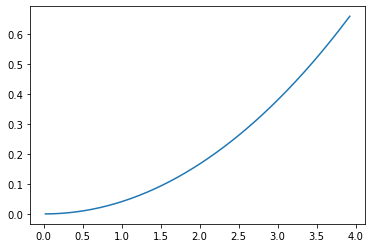

In [627]:
#running the solver in loop
for i in range(0,1):
# Solve the problem using a guess
    solver=F(x0=[0.4,0.023,15,5],lbx=0.1,ubx=1.0,ubg=0.00, lbg=0)
    out=[]
    out.append(solver["x"])
    print("solved output",solver["x"])
    print("solved function output",solver["f"])
    print(nlpsol_out)
    v=out[0][0]
    ang=out[0][1]
    xc,yc,zc=[],[],[]
    x,y,theta=0,0,0
    fuel=[]
    temp=0
    val=0
    for i in range(0,dt):
        x = x + v*math.cos(theta)*0.2
        y = y + v*math.sin(theta)*0.2 
        theta = theta + (v / L) * math.tan(ang)*0.2
        xc.append(x)
        yc.append(y)
        zc.append(theta)
        #val=sqrt((v**2*(xc[i]**2)+ang**2*(yc[i]**2)))
        #fuel.append(val)
        #temp+=val
    #print(xc[-1],yc[-1])
    #plt.plot(fuel)
    #plt.show()
    plt.plot(xc,yc)
    plt.show()

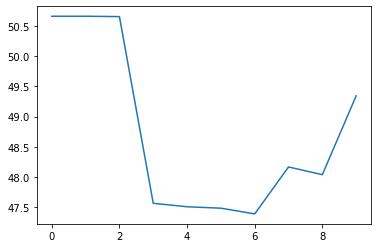

In [457]:
loss=[5.0661393e+001,5.0661393e+001 ,5.0655255e+001,4.7563294e+001,4.7506171e+001 ,4.7482457e+001 ,4.7387446e+001 ,4.8165258e+001 ,4.8037306e+001 ,4.9342843e+001] 
plt.plot(loss)

**create constraints and initilize optimization variables**

1. Here the constraints are bounday conditions around the magins(inequality constraint)
2. waypoints are(equality constraint)
3. Destination(equality constraint)
4. Obstacles(inequality constraint)


**The optimization varilables are control inputs**

1. U1= Linear Velocity 
2. U2= Angular Velocity

**Main function to iterate over the solver**

In [685]:
x=MX.sym('x')
func= sqrt((x-100)**2+(sqrt(x)-0)**2)                                                      
nlp= {}
nlp['x']=vertcat(x)
nlp['f']=func
nlp['g']=0
#create solver instance
F = nlpsol('F','ipopt',nlp);
print(nlp)

{'x': MX(x), 'f': MX(sqrt((sq((x-100))+x))), 'g': 0}


In [ ]:
#simple point solver (learning example)
solver=F(x0=0)
out=[]
out.append(solver["x"])
print("solved output",solver["x"])
print("solved function output",solver["f"])

In [ ]:
y=[]
for i in range(0,20):
    y.append(sqrt(i))
plt.plot(y)

In [44]:
#minimize the distance by varying the velocity and time
from casadi import *
import math
dest=[3,3]
v=MX.sym('v')
t=MX.sym('t')
ang=MX.sym('ang')
t=10
func=0
g=0
dt=100
func1,func2=0,0
#func = sqrt((((v*math.cos(0.1)*t)-dest[0])**2)+((v*math.sin(0.1)*t)-dest[1])**2)+(-0.0177*v**2+1.48*v+3.39)
func = sqrt((((0.4*cos((0.4/1.2)*tan(ang)*t)*t)-dest[0])**2)+((0.4*sin((0.4/1.2)*tan(ang)*t)*t)-dest[1])**2)
#new function
'''
for _ in range(0,100):
    theta= theta+ (0.4/1.2)*tan(ang)*t/100
    func1 = func1+ (0.4*cos(theta)*t/100)
    func2= func2+ (0.4*sin(theta)*t/100)
func= sqrt((((func1-dest[0])**2)+(func2-dest[1])**2))
'''
nlp= {}
nlp['x']=vertcat(ang)
#nlp['x']=vertcat(v,t) 
nlp['f']=func
nlp['g']=0
opts= {}
opts["ipopt.max_iter"]=5000
#create solver instance
F = nlpsol('F','ipopt',nlp,opts);
print(nlp)

{'x': MX(ang), 'f': MX(sqrt((sq(((10*(0.4*cos((10*(0.333333*tan(ang))))))-3))+sq(((10*(0.4*sin((10*(0.333333*tan(ang))))))-3))))), 'g': 0}


In [45]:
lbx=[0.02]
ubx=[0.2]
#solver=F(x0=[0.1,2],lbx=lbx,ubx=ubx)
solver=F(x0=[0.2],lbx=lbx,ubx=ubx)
out=[]
out.append(solver["x"])
print("solved output",out)
print("solved function output",solver["f"])

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        1

Total number of variables............................:        1
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        1
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        1
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 5

time 20
velocity 0.4
angle 0.02
7.976664987835587 0.5272961558667796


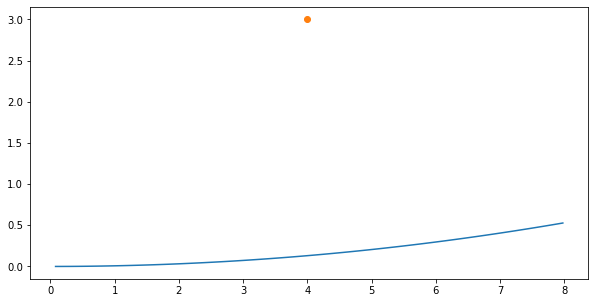

In [162]:
import matplotlib.pyplot as plt
import math
#t=out[0][0]
ang=out[0][0]
#ang=out[0][2]
v=0.4
t=20
print("time",t)
print("velocity",v)
print("angle",ang)
#print(ang)
xc,yc=[],[]
theta=0.0
#ang=0.1
x1,x2=0,0
t=t/100
for i in range(0,100):
    x1=x1+v*math.cos(theta)*t
    x2=x2+v*math.sin(theta)*t
    theta = theta + (v / 1.2) * math.tan(ang)*t
    xc.append(x1)
    yc.append(x2)
print(x1,x2)
plt.figure(figsize=(10, 5))
plt.plot(xc,yc,dest[0],dest[1],"o")


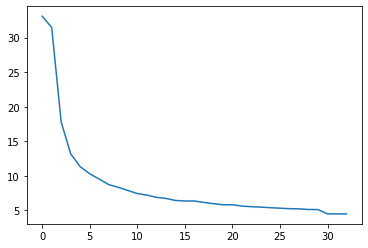

In [282]:
 cost=[3.3099703e+001,
    3.1484916e+001 ,
    1.7774696e+001 ,
    1.3164476e+001,
    1.1309515e+001 ,
    1.0286753e+001,
    9.5050779e+000 ,
    8.7115020e+000,
    8.3286052e+000 ,
    7.8670146e+000,
   7.4222025e+000 ,
   7.1945799e+000,
   6.8714011e+000 ,
  6.7117983e+000 ,
   6.4199344e+000,
   6.3441764e+000 ,
   6.3402380e+000 ,
   6.1372877e+000 ,
   5.9515466e+000 ,
   5.8014162e+000, 
   5.7958203e+000, 
   5.5985301e+000,
   5.5147993e+000 ,
   5.4537076e+000 ,
   5.3693894e+000 ,
   5.2996137e+000,
   5.2274934e+000 ,
   5.2038087e+000 ,
 5.1099343e+000,
 5.0969828e+000,
4.4690714e+000 ,
4.4690695e+000 ,
   4.4690695e+000]

plt.plot(cost)

In [3]:
from casadi import *
from numpy import *
%matplotlib inline
#import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
class Iteration_Callback(Callback):
    def __init__(self, name, nx, ng, opts={}):
        Callback.__init__(self)

        self.nx = nx
        self.ng = ng

        self.x_sols = []
        self.f_sols = []
        self.g_sols = []
        self.lam_x_sols = []
        self.lam_g_sols = []
        self.lam_p_sols = []
        '''
        #for plotting the graph in realtime
        self.fig= plt.figure()
        self.ax1= self.fig.add_subplot(1,2,1)
        self.ax2= self.fig.add_subplot(2,2,1)
        self.fig.show()
        '''
        # Initialize internal objects
        self.construct(name, opts)

    def get_n_in(self): return nlpsol_n_out()
    def get_n_out(self): return 1
    def get_name_in(self, i): return nlpsol_out(i)
    def get_name_out(self, i): return "ret"

    def get_sparsity_in(self, i):
        n = nlpsol_out(i)
        if n == 'f':
            return Sparsity.scalar()
        elif n in ('x', 'lam_x'):
            return Sparsity.dense(self.nx)
        elif n in ('g', 'lam_g'):
            return Sparsity.dense(self.ng)
        else:
            return Sparsity(0, 0)

    def eval(self, arg):
        
        darg = {}
        for (i, s) in enumerate(nlpsol_out()): darg[s] = arg[i]
        x_sol = [float(elem) for elem in darg['x'].full()]
        
        self.x_sols.append(x_sol)
        self.f_sols.append(darg['f'].full()[0][0])
        self.g_sols.append(darg['g'].full()[0][0])
        self.lam_x_sols.append(darg['lam_x'].full())
        self.lam_g_sols.append(darg['lam_g'].full())
        self.lam_p_sols.append(darg['lam_p'].full())
        #print("solution",self.f_sols)
        '''
        #for plotting the graph in realtime
        self.ax1.plot(self.x_sols)
        self.ax2.plot(self.f_sols)
        self.fig.canvas.draw()
        self.fig.canvas.flush_events()
        plt.show()
        '''
        plt.plot(self.f_sols,color='C0')
        #plt.plot(self.g_sols,color='C0')
        #print(self.g_sols)
        return[0]

In [7]:
from casadi import *
import math
dest=[3,1]
#way=[3,0]
t=SX.sym('t')
v=SX.sym('v')
dt= 10
rob_rad=0.1
obs_rad=0.1
ang=SX.sym("ang",dt)
#v=SX.sym("v")
#t=SX.sym("t")
print(ang)
func,func1,func2=0,0,0
g=0
theta=0
fuel_cost=0
coff=0.0045
for i in range(0,dt):
        func1=func1+v*cos(theta)*t
        func2=func2+v*sin(theta)*t
        theta=theta + (v / 1.2)*tan(ang[i])*t
        fuel_cost=fuel_cost+(-0.0177*v**2+1.48*v+3.39)
        #if i==dt/2:
            #func_con=(sqrt(coff+(func1-way[0])**2+(func2-way[1])**2))
        if i==dt-1:
            func=(sqrt(coff+(func1-dest[0])**2+(func2-dest[1])**2))+fuel_cost
            #g=sqrt((func1-way[0])**2+(func2-way[1])**2)-(rob_rad+obs_rad)
            #g=func_con
            print(func)     
            print(g)
nlp= {}
nlp['x']=vertcat(ang,v,t)
nlp['f']=func
nlp['g']=0
mycallback = Iteration_Callback('mycallback',(dt+2), 1)
opts = {}
opts['iteration_callback'] = mycallback
opts['ipopt.tol'] = 1e-8
opts["ipopt.max_iter"]=5000
#create solver instance
F = nlpsol('F','ipopt',nlp,opts);
print(F)

[ang_0, ang_1, ang_2, ang_3, ang_4, ang_5, ang_6, ang_7, ang_8, ang_9]
@1=1.2, @2=(((v/@1)*tan(ang_0))*t), @3=(@2+(((v/@1)*tan(ang_1))*t)), @4=(@3+(((v/@1)*tan(ang_2))*t)), @5=(@4+(((v/@1)*tan(ang_3))*t)), @6=(@5+(((v/@1)*tan(ang_4))*t)), @7=(@6+(((v/@1)*tan(ang_5))*t)), @8=(@7+(((v/@1)*tan(ang_6))*t)), @9=(@8+(((v/@1)*tan(ang_7))*t)), @10=(@9+(((v/@1)*tan(ang_8))*t)), @11=-0.0177, @12=1.48, @13=3.39, ((sqrt(((0.0045+sq((((((((((((v*t)+((v*cos(@2))*t))+((v*cos(@3))*t))+((v*cos(@4))*t))+((v*cos(@5))*t))+((v*cos(@6))*t))+((v*cos(@7))*t))+((v*cos(@8))*t))+((v*cos(@9))*t))+((v*cos(@10))*t))-3)))+sq((((((((((((v*sin(@2))*t)+((v*sin(@3))*t))+((v*sin(@4))*t))+((v*sin(@5))*t))+((v*sin(@6))*t))+((v*sin(@7))*t))+((v*sin(@8))*t))+((v*sin(@9))*t))+((v*sin(@10))*t))-1))))+((@10+(((v/@1)*tan(ang_9))*t))-0.785398))+((((((((((((@11*sq(v))+(@12*v))+@13)+(((@11*sq(v))+(@12*v))+@13))+(((@11*sq(v))+(@12*v))+@13))+(((@11*sq(v))+(@12*v))+@13))+(((@11*sq(v))+(@12*v))+@13))+(((@11*sq(v))+(@12*v))+@13))+(((@11

[0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.2, 0.2]

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       66

Total number of variables............................:       12
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       12
             

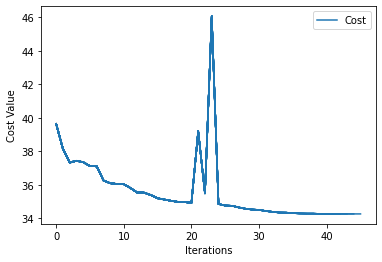

In [5]:
#solver=F(x0=[0.1,2],lbx=lbx,ubx=ubx)
x0=[]
lbx=[]
ubx=[]
# the loop for setting angle
for i in range(0,dt):
    x0.append(0.02)
    lbx.append(0.02)
    #ubx.append(0.2)  #previous value
    ubx.append(0.5)
# the loop for setting velocity  
for i in range(0,1):
    x0.append(0.2)
    lbx.append(0.02)
    ubx.append(2)
# the loop for setting sample time 
for i in range(0,1):
    x0.append(0.2)
    lbx.append(0.02)
    #ubx.append(2) #previous value
    ubx.append(35)
print(x0)
solver=F(x0=x0,lbx=lbx,ubx=ubx,lbg=0,ubg=0)
out=[]
out.append(solver["x"])
print("solved output",out)
print("solved function output",solver["f"])
plt.legend(["Cost"])
plt.xlabel("Iterations")
plt.ylabel("Cost Value")
plt.show()

angle [DM(0.259422), DM(0.259515), DM(0.259602), DM(0.259682), DM(0.259754), DM(0.25982), DM(0.259877), DM(0.259927), DM(0.259968), DM(0.26)]
3 1


Text(0, 0.5, 'Y Coordinates')

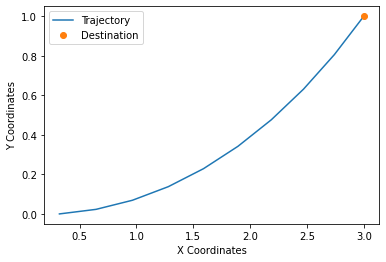

In [6]:
import matplotlib.pyplot as plt
import math
ang=[]
v=[]
t=[]
for i in range(0,dt):
    ang.append(out[0][i])
print("angle",ang)
v.append(out[0][10])
t.append(out[0][11])
xc,yc=[],[]
theta=0.0
x1,x2=0,0
for i in range(0,dt):
    x1=x1+v[0]*math.cos(theta)*t[0]
    x2=x2+v[0]*math.sin(theta)*t[0]
    theta = theta + (v[0] / 1.2) * math.tan(ang[i])*t[0]
    xc.append(x1)
    yc.append(x2)
print(x1,x2)
#plt.figure(figsize=(6, 4))
plt.plot(xc,yc,dest[0],dest[1],"o")
plt.legend(["Trajectory","Destination"])
plt.xlabel("X Coordinates")
plt.ylabel("Y Coordinates")

Text(0, 0.5, 'Cost Value')

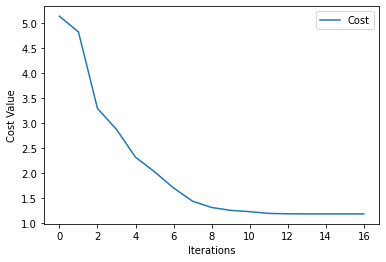

In [103]:
cost1=[]
cost1=[5.1407028e+000,4.8279191e+000 ,
    3.2988949e+000, 
    2.8788262e+000 ,
    2.3243103e+000 ,
    2.0325987e+000 ,
    1.7099310e+000 ,
   1.4452566e+000 ,
    1.3194831e+000 ,
    1.2617696e+000 ,
  1.2360491e+000, 1.2009504e+000, 
   1.1934256e+000 ,
   1.1910525e+000 ,
   1.1910547e+000 ,
   1.1908748e+000 ,
   1.1908742e+000 ]
plt.plot(cost1)
plt.legend(["Cost"])
plt.xlabel("Iterations")
plt.ylabel("Cost Value")

In [629]:
xv=0
x=[]
v=0.4
a=0.3
out1=(v*cos(a))+(v*cos(a))+(v*cos(a))+(v*cos(a))+(v*cos(a))+(v*cos(a))+(v*cos(a))+(v*cos(a))+(v*cos(a))+(v*cos(a))
for i in range(0,10):
    xv=xv+v*cos(a)
    x.append(xv)
print(xv)
print(out1)

3.821345956502425
3.821345956502425


In [27]:
x = SX.sym('x'); y = SX.sym('y'); z = SX.sym('z')
nlp = {'x':vertcat(x,y,z), 'f':x**2+100*z**2, 'g':z+(1-x)**2-y}
S = nlpsol('S', 'ipopt', nlp)
print(S)

S:(x0[3],p[],lbx[3],ubx[3],lbg,ubg,lam_x0[3],lam_g0)->(x[3],f,g,lam_x[3],lam_g,lam_p[]) IpoptInterface


In [28]:
r = S(x0=[2.5,3.0,0.75],lbg=0, ubg=0)
x_opt = r['x']
print('x_opt: ', x_opt)

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        3
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        2

Total number of variables............................:        3
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 6

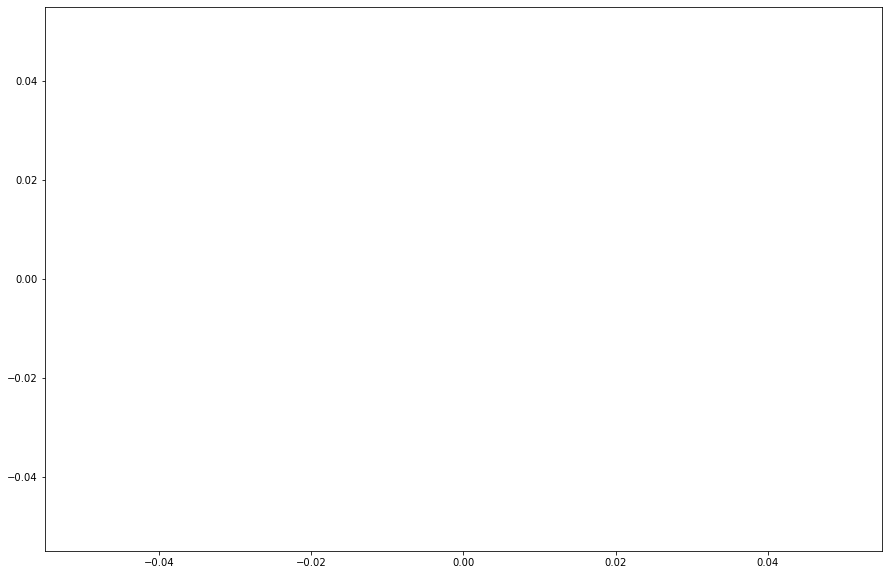

In [160]:
plt.figure(figsize=(15, 10))
plt.plot()
plt.show()

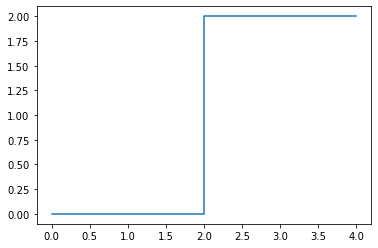

In [7]:
#generate trajectory between 2 points
import matplotlib.pyplot as plt
import numpy
x=[0,2,2,4]
y=[0,0,2,2]
plt.plot(x,y)

In [38]:
import numpy
def getEquidistantPoints(p1, p2, parts):
    return zip(numpy.linspace(p1[0], p2[0], parts+1),
               list(numpy.linspace(p1[1], p2[1], parts+1)))
val=[]
val.append(list(getEquidistantPoints((0,0), (2,0), 10)))
val.append(list(getEquidistantPoints((2,0), (2,2), 10)))
val.append(list(getEquidistantPoints((2,2), (4,2), 10)))
out=[]
for i in range(0,len(val)):
    for k in range(0, len(val[i])):
        out.append(list(val[i][k]))
print(out)

[[0.0, 0.0], [0.2, 0.0], [0.4, 0.0], [0.6000000000000001, 0.0], [0.8, 0.0], [1.0, 0.0], [1.2000000000000002, 0.0], [1.4000000000000001, 0.0], [1.6, 0.0], [1.8, 0.0], [2.0, 0.0], [2.0, 0.0], [2.0, 0.2], [2.0, 0.4], [2.0, 0.6000000000000001], [2.0, 0.8], [2.0, 1.0], [2.0, 1.2000000000000002], [2.0, 1.4000000000000001], [2.0, 1.6], [2.0, 1.8], [2.0, 2.0], [2.0, 2.0], [2.2, 2.0], [2.4, 2.0], [2.6, 2.0], [2.8, 2.0], [3.0, 2.0], [3.2, 2.0], [3.4000000000000004, 2.0], [3.6, 2.0], [3.8, 2.0], [4.0, 2.0]]


[[0.0, 0.0], [0.07692307692307693, 0.15384615384615385], [0.15384615384615385, 0.3076923076923077], [0.23076923076923078, 0.46153846153846156], [0.3076923076923077, 0.6153846153846154], [0.38461538461538464, 0.7692307692307693], [0.46153846153846156, 0.9230769230769231], [0.5384615384615385, 1.076923076923077], [0.6153846153846154, 1.2307692307692308], [0.6923076923076923, 1.3846153846153846], [0.7692307692307693, 1.5384615384615385], [0.8461538461538463, 1.6923076923076925], [0.9230769230769231, 1.8461538461538463], [1.0, 2.0], [1.076923076923077, 1.8461538461538458], [1.153846153846154, 1.692307692307692], [1.2307692307692308, 1.5384615384615383], [1.3076923076923077, 1.3846153846153846], [1.3846153846153846, 1.2307692307692308], [1.4615384615384617, 1.0769230769230766], [1.5384615384615385, 0.9230769230769229], [1.6153846153846154, 0.7692307692307692], [1.6923076923076925, 0.6153846153846149], [1.7692307692307694, 0.4615384615384611], [1.8461538461538463, 0.3076923076923074], [1.923

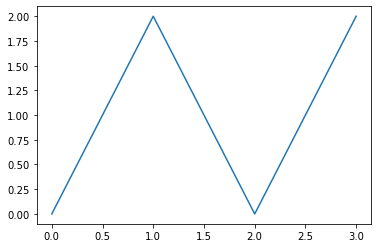

In [214]:
#sawtooth wavefrom
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(0, 3, 40)
triangle = signal.sawtooth(2 * np.pi *0.5* t, 0.5)
plt.plot(t, triangle+1)
li=[]
t=list(t)
for i in range(0,len(t)):
    li.append([t[i],triangle[i]+1])
print(li)

In [14]:
import csv 
Details = ['Name', 'class', 'passoutYear', 'subject']  
row1 =  [1, 2, 3, 1]
row2= ['john', '3rd', '2022', 'M2']
row3=['kushi', '4th', '2021', 'M4']
val=np.array([row1,row2,row3])
with open('student.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerow(Details) 
    write.writerows(val) 

In [202]:
filename1="C:\\Users\\Prakash\\Desktop\\UDRI_project_path_planning\\case_2_angle\\case_2_angle\\case_3\\case2_3_pid.csv"
filename2="C:\\Users\\Prakash\\Desktop\\UDRI_project_path_planning\\case_2_angle\\case_2_angle\\case_3\\case2_3_angle.csv"

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
ref_traj = pd.read_csv(filename2)
ref_x=ref_traj["x_coord"]
ref_y=ref_traj["y_coord"]
plt.plot(ref_x,ref_y)
plt.plot(4,2,"o")
plt.legend(["Trajectory","Destination"])
plt.xlabel("X Coordinates")
plt.ylabel("Y Coordinates")
plt.savefig("trajectory.png",dpi=150)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Prakash\\Desktop\\UDRI_project_path_planning\\case_2_angle\\case_2_angle\\case_3\\case2_3_angle.csv'

In [204]:
#Reading the PID CSV files
out=[]
with open(filename1, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        out.append(row)
#print(out)
print(float(out[2][1]))
print(out[1])

0.0017637864170204688
['0.15706529748201403', '0.40905335247574687', '0.6644001014263838', '0.9170714195456944', '1.1729723312767504', '1.4256086409413218', '1.6804272832650844', '1.9363161985940018', '2.186176828255273', '2.433740480950465', '2.670707986996013', '2.9010363500564718', '3.113991921079745', '3.307613193867218', '3.482257310453496', '3.635896020719732', '3.7630706068860387', '3.8597672864325627', '3.932267710992598', '3.9730410387171466']


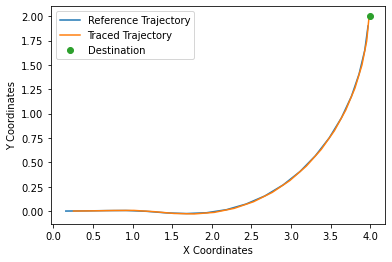

In [205]:
#Super imposing trajectories
x=[float(out[1][i]) for i in range(0,len(out[1]))]
y=[float(out[2][j]) for j in range(0,len(out[1]))]
plt.plot(x,y)
plt.plot(ref_x,ref_y)
plt.plot(4,2,"o")
plt.legend(["Reference Trajectory","Traced Trajectory","Destination"])
plt.xlabel("X Coordinates")
plt.ylabel("Y Coordinates")
plt.savefig("trajectory_1_impose.png")

Text(0, 0.5, 'Linear Velocity in m/s')

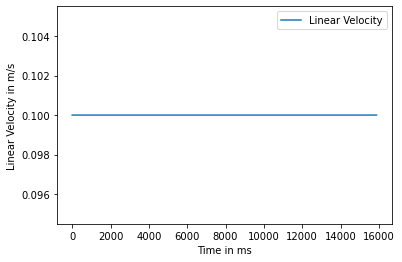

In [206]:
#plotting the linear velocity
velocity_lin=[float(out[5][i]) for i in range(0,len(out[5]))]
plt.plot(velocity_lin)
plt.legend(["Linear Velocity"])
plt.xlabel("Time in ms")
plt.ylabel("Linear Velocity in m/s")

In [207]:
yaw=[float(out[3][i]) for i in range(0,len(out[3]))]
theta=[float(out[4][j]) for j in range(0,len(out[4]))]

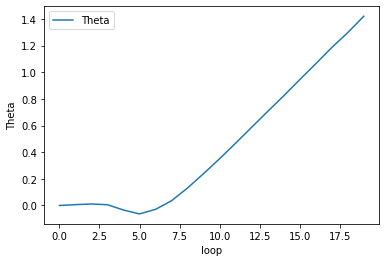

Text(0, 0.5, 'Yaw')

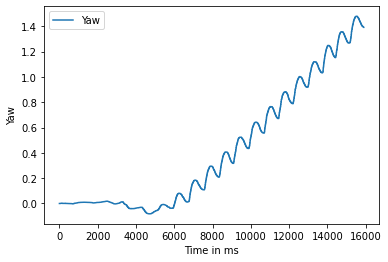

In [208]:
#plt.plot(yaw)
plt.figure
plt.plot(theta)
plt.legend(["Theta"])
plt.xlabel("loop")
plt.ylabel("Theta")
plt.show()
plt.figure
plt.plot(yaw)
plt.legend(["Yaw"])
plt.xlabel("Time in ms")
plt.ylabel("Yaw")

Text(0, 0.5, 'Angular Velocity in m/s')

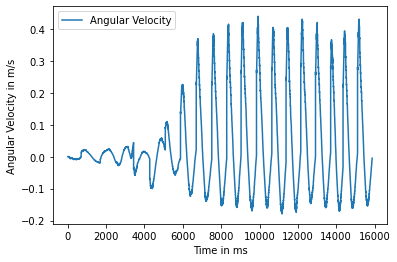

In [210]:
ang_velocity=[float(out[6][j]) for j in range(0,len(out[6]))]
plt.plot(ang_velocity)
plt.legend(["Angular Velocity"])
plt.xlabel("Time in ms")
plt.ylabel("Angular Velocity in m/s")